In [31]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
    
def compare(*args, **kwargs):
    importlib.reload(j)
    j.compare(*args, **kwargs)

In [32]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson
dirr logs/zte_mtn/rf_shield/ublox/


TypeError: object of type 'NoneType' has no len()

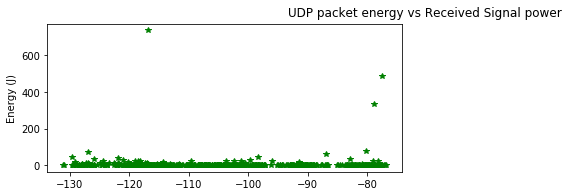

In [61]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    if key == 'Signal power':
        r *= a > -1450
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, split=1)

In [62]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays


custom jupyter @DanielRobinson
[ 30.  71. 112. 153. 194. 235. 276. 317. 358. 399. 440. 481. 522. 563.
 604. 645. 686. 727. 768. 809. 850.]
[ 30.  71. 112. 153. 194. 235. 276. 317. 358. 399. 440. 481. 522. 563.
 604. 645. 686. 727. 768. 809. 850.]
dirr logs/zte_mtn/rf_shield/ublox/
dirr logs/zte_mtn/rf_shield/quectel/
[ 0.  2.  3.  4.  6.  8.  9. 10. 12. 14. 15. 16. 18. 20. 21. 22. 24. 26.
 27. 28. 30.]
dirr logs/nokia_vodacom/centurycity/ublox/
dirr logs/nokia_vodacom/centurycity/quectel/
[ 0.  2.  3.  4.  6.  8.  9. 10. 12. 14. 15. 16. 18. 20. 21. 22. 24. 26.
 27. 28. 30.]


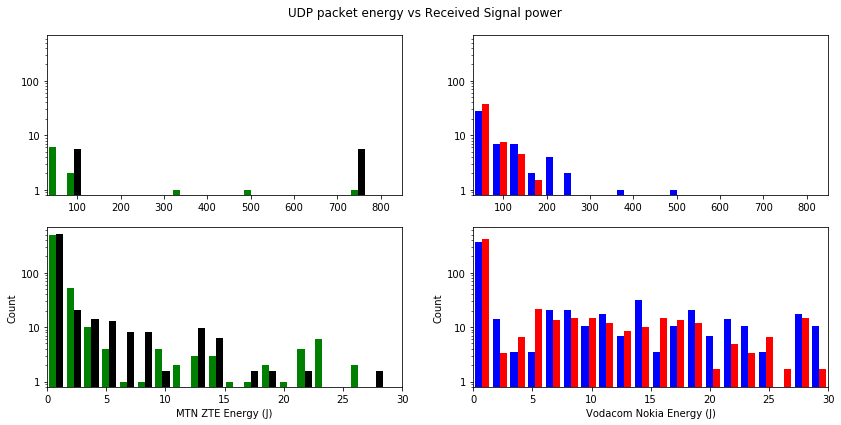

In [94]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    if key == 'energy':
        r *= a > 0
        limits = [850000, 30000, 0]
        r, lim = j.splitter(r, a, limits, split, True)
#         print(lim)
    if key == 'Signal power':
        r *= a > -1450
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, split=2, hist=True, log=True)

custom jupyter @DanielRobinson


TypeError: object of type 'NoneType' has no len()

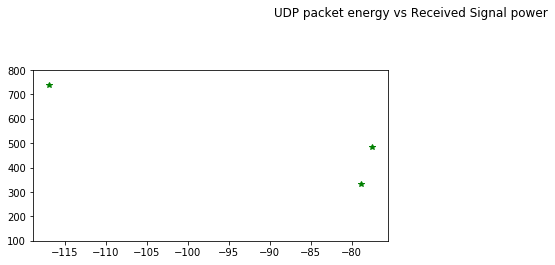

In [91]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'energy':
        r *= a > 0
        limits = [800000, 100000, 10000, 2000, 100, 0]
        # r, lim = j.splitter(r, a, limits[1:-1], split)
        lim = [limits[tsplit+1], limits[tsplit]]
        r *= a < limits[tsplit]
        r *= a >= limits[tsplit+1]
    elif key == 'Signal power':
        r *= a > -1450
        lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, split=5)

(array([4., 0., 4., 0., 0., 5., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

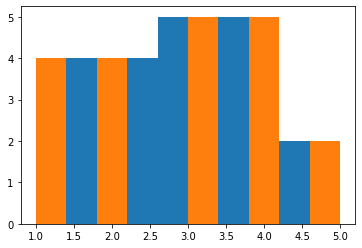

In [57]:
a = [1,1,1,2,5,5,4,2,3,4,4,3,2,1,2,3,3,4,4,3,]
plt.hist(a, 5)
plt.hist(a, range=[min(a), max(a)])

In [187]:
h = np.histogram(a, range=[min(a), max(a)])
# np.histogram?

custom jupyter @DanielRobinson
[100. 135. 170. 205. 240. 275. 310. 345. 380. 415. 450. 485. 520. 555.
 590. 625. 660. 695. 730. 765. 800.]
[100. 135. 170. 205. 240. 275. 310. 345. 380. 415. 450. 485. 520. 555.
 590. 625. 660. 695. 730. 765. 800.]
[ 10.  14.  19.  24.  28.  32.  37.  42.  46.  50.  55.  60.  64.  68.
  73.  78.  82.  86.  91.  96. 100.]
[ 10.  14.  19.  24.  28.  32.  37.  42.  46.  50.  55.  60.  64.  68.
  73.  78.  82.  86.  91.  96. 100.]
[ 2.  2.  3.  3.  4.  4.  4.  5.  5.  6.  6.  6.  7.  7.  8.  8.  8.  9.
  9. 10. 10.]
[ 2.  2.  3.  3.  4.  4.  4.  5.  5.  6.  6.  6.  7.  7.  8.  8.  8.  9.
  9. 10. 10.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]
dirr logs/zte_mtn/rf_shield/ublox/
dirr logs/zte_mtn/rf_shield/quectel/
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dirr logs/nokia_vodacom/centurycity/ublox/
dirr logs/nokia_vodacom/centurycity/quectel/
[0. 0. 0

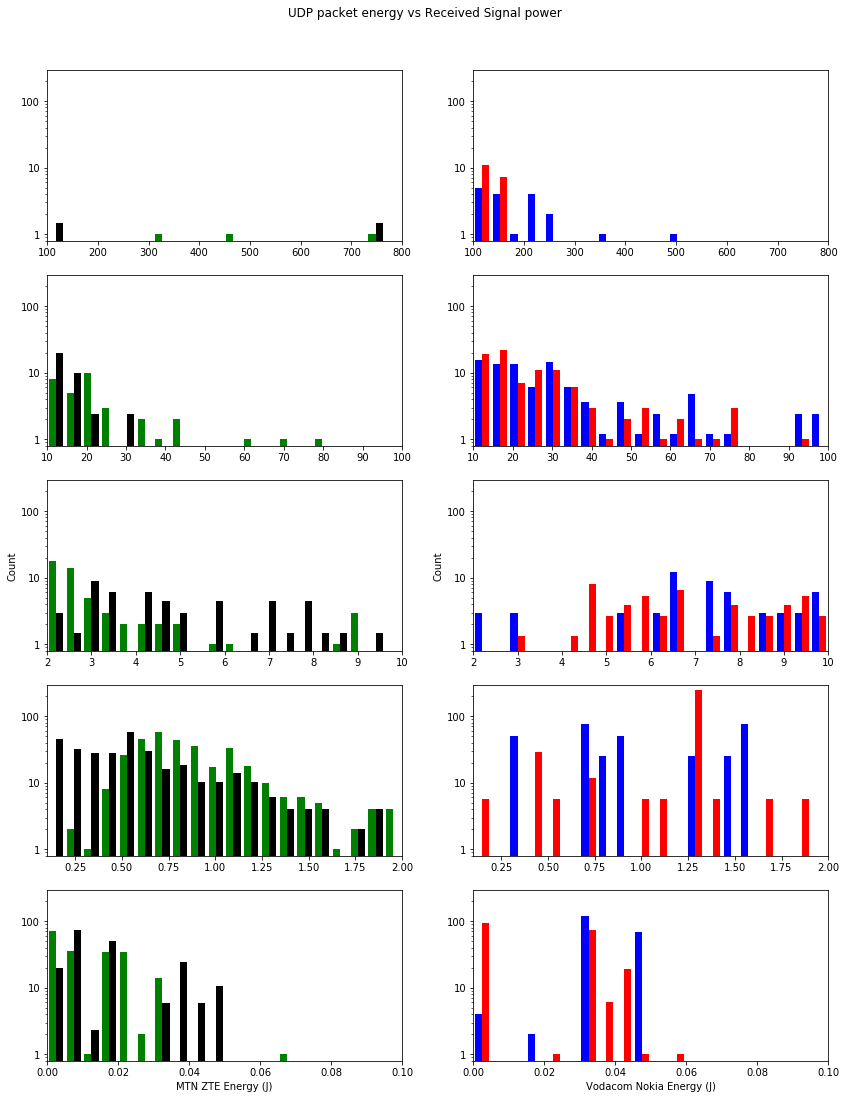

In [93]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['zte', 'nokia'], 5, True, 20, True)

custom jupyter @DanielRobinson
100.0 800.0 0.0 2.1
10.0 100.0 0.0 40.95
2.0 10.0 0.0 7.35
0.1 2.0 0.0 44.1
0.0 0.1 0.0 99.75


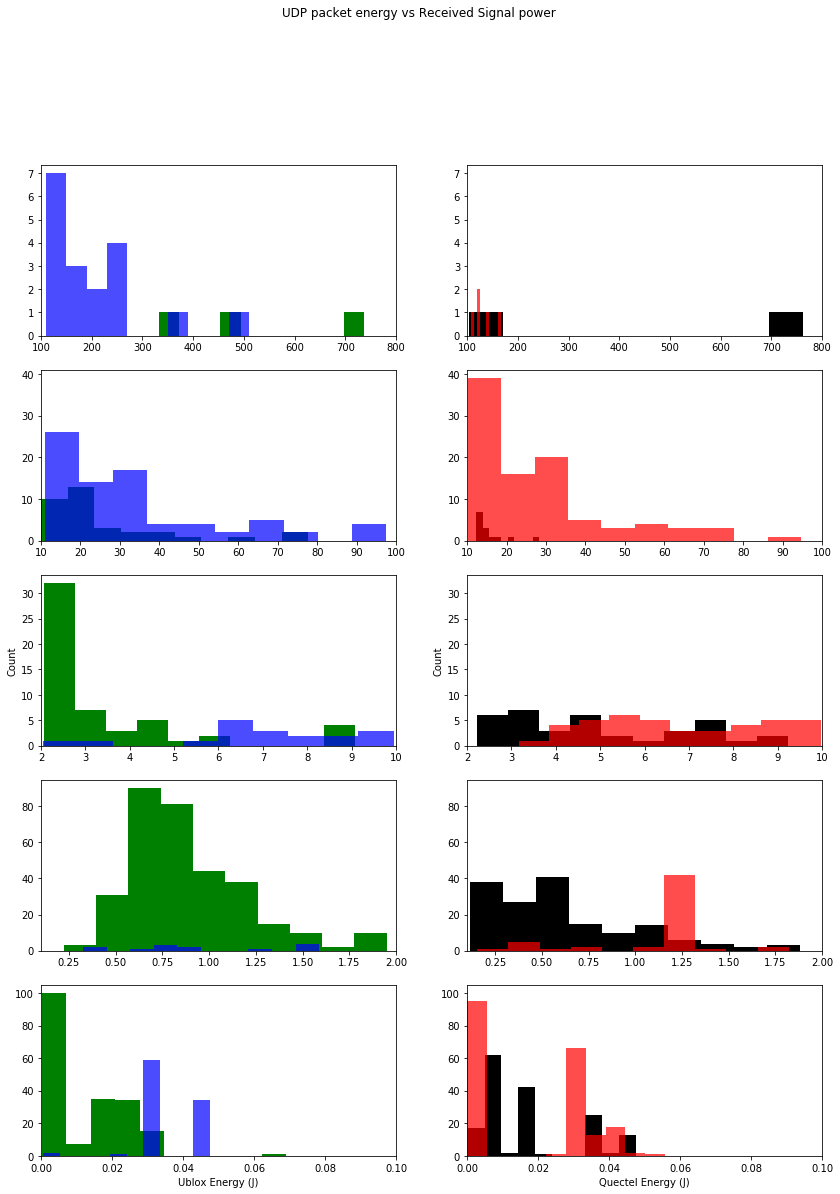

In [167]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['zte', 'nokia'], ['ublox', 'quectel'], 5, True)